In [40]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [41]:
df = pd.read_csv('temperature_37years.csv', index_col='timestamp', parse_dates=True)['Basel Temperature [2 m elevation corrected]'].to_frame()
df.head()

,Basel Temperature [2 m elevation corrected]
timestamp,
1985-01-01 00:00:00,-3.294971
1985-01-01 01:00:00,-3.274971
1985-01-01 02:00:00,0.355029
1985-01-01 03:00:00,0.365029
1985-01-01 04:00:00,0.415029


<AxesSubplot: xlabel='timestamp'>

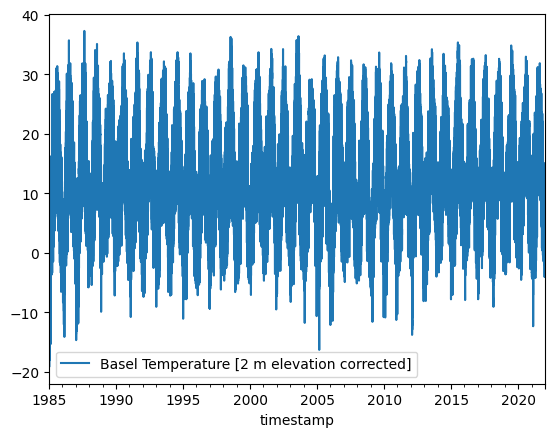

In [42]:
df.plot()

<AxesSubplot: xlabel='timestamp'>

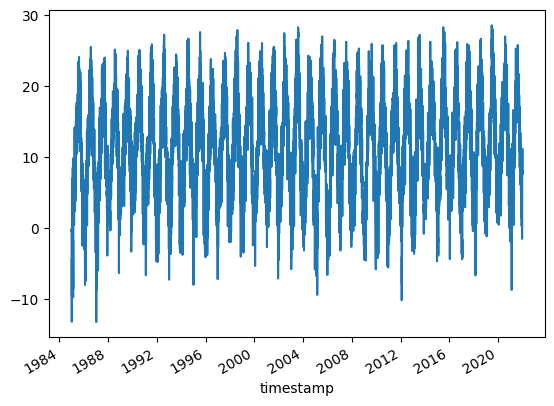

In [43]:
df['Daily SMA'] = df['Basel Temperature [2 m elevation corrected]'].rolling(24).mean().shift(-11)
df['Daily SMA'][12::24].plot()